In [91]:
import pandas as pd

In [92]:
menu_df = pd.read_csv("drinkMenu.csv")

### Explore Dataset

In [93]:
menu_df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [94]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

It appears that only Caffeine (mg) has null values

### Data Preperation

##### Drop duplicates on row level

In [95]:
menu_df.duplicated().sum()

0

There are no duplicates 

##### Fill null values

In [96]:
menu_df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

There is only on null value in Caffeine (mg).

In [97]:
# Fill the null value with 0
menu_df['Caffeine (mg)'].fillna(0, inplace=True)

##### Drop unnecesary columns

Drop unnecessary columns since in the task it's required to use 'Calories' and ' Sugars (g)' columns 
and the 'Beverage_category', 'Beverage', 'Beverage_prep' to identify the drink the rest of the columns are unnecessary.

In [98]:
menu_df = menu_df[['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories', ' Sugars (g)']]

##### Fill null values

In [99]:
menu_df.isnull().sum()

Beverage_category    0
Beverage             0
Beverage_prep        0
Calories             0
 Sugars (g)          0
dtype: int64

There is no null values in the targeted columns

##### Rename columns to suitable names

In [100]:
menu_df.rename(columns={'Beverage_category':'beverage_category', 'Beverage':'beverage', 'Beverage_prep':'beverage_prep', 'Calories':'calories',\
                 ' Sugars (g)':'sugar_g'}, inplace=True)

##### Check for duplicates on row level

In [101]:
menu_df.duplicated().sum()

0

It appears there are no duplicates in the dataset

In [102]:
menu_df.head()

,beverage_category,beverage,beverage_prep,calories,sugar_g
0,Coffee,Brewed Coffee,Short,3,0
1,Coffee,Brewed Coffee,Tall,4,0
2,Coffee,Brewed Coffee,Grande,5,0
3,Coffee,Brewed Coffee,Venti,5,0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,9


### Data Visualization

To answer question in vizualization. I used only beverege columne to reduce the number of labels and efficently understand the vizualization

Which drink has the highest calories from the dataset?

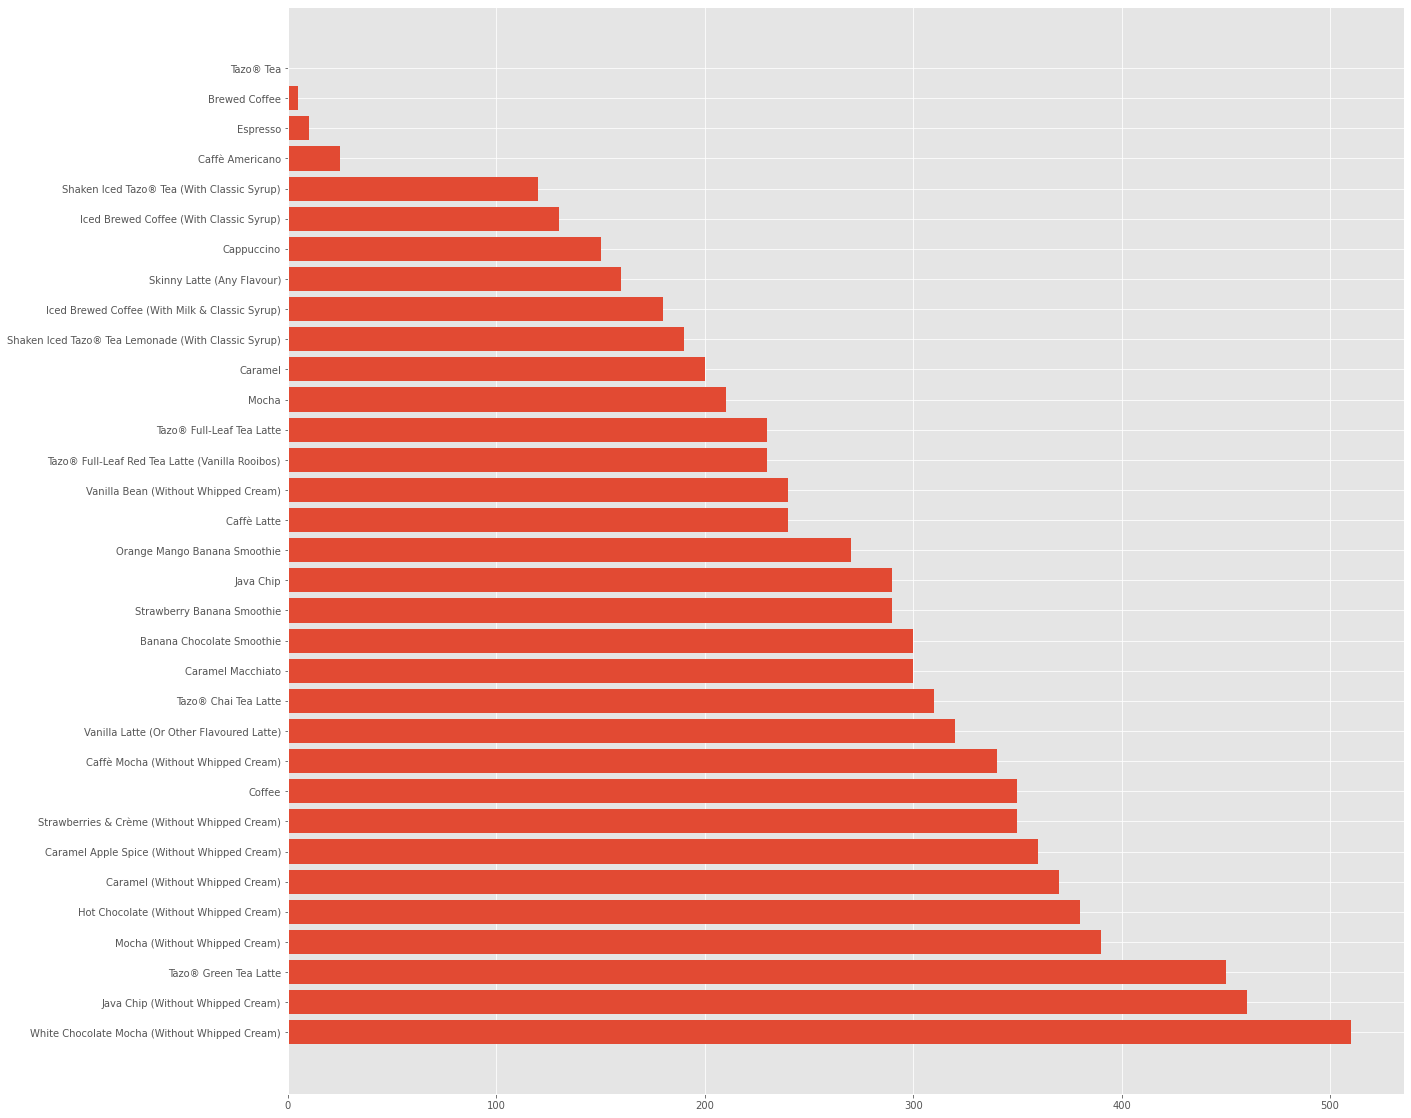

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
menu_df_q_1 = menu_df.sort_values("calories", ascending=False) 
plt.figure(figsize=(20,20))
plt.barh(menu_df_q_1['beverage'], menu_df_q_1['calories'])
plt.show()

It appears that White Chocolate Mocha (Without Whipped Cream) has the highest calories.

Highest Sugar Drink ?

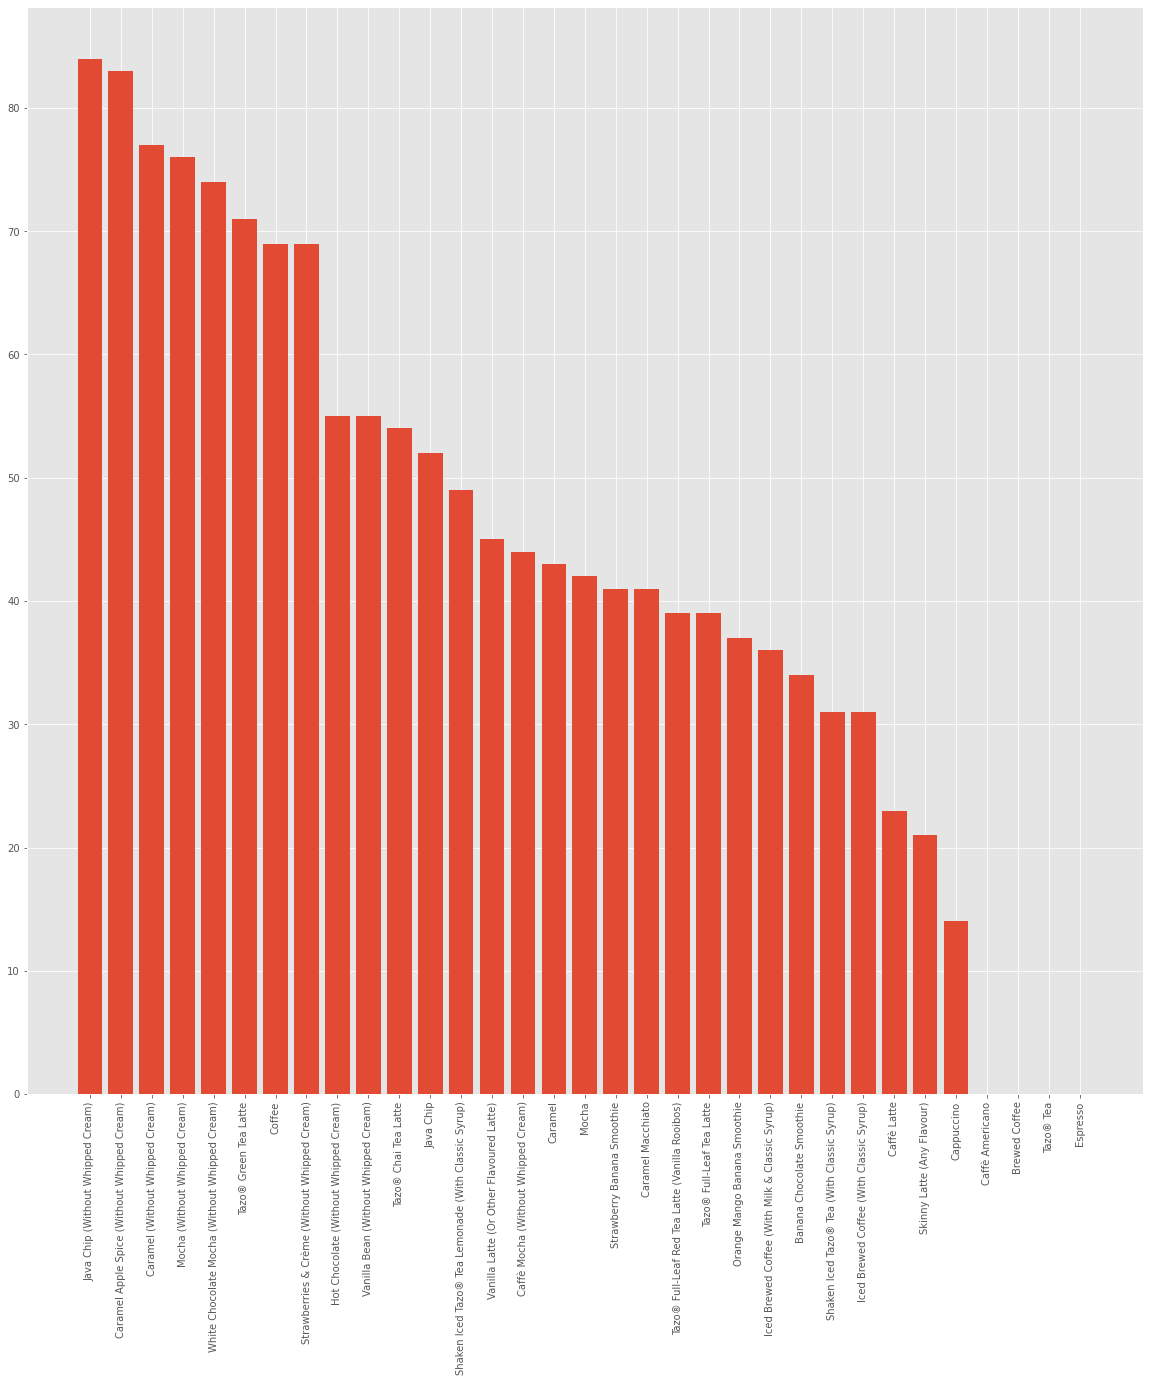

In [104]:
menu_df_q_2 = menu_df.sort_values("sugar_g", ascending=False) 
plt.figure(figsize=(20,20))
plt.xticks(rotation='vertical')
plt.bar(menu_df_q_2['beverage'], menu_df_q_2['sugar_g'])
plt.show()

It appears that Java Chip (Without Whiped Cream) has the highest suger